In [1]:
# Library Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
dfBSC = pd.read_csv('Data/evodefi.csv')

# Convert to readable timestamps
dfBSC['timeGMT'] = pd.to_datetime(dfBSC['timeStamp'], unit='s')
dfBSC.head(2)

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations,timeGMT
0,7929705,1622588943,0xff2842f9b1b5687c3c830b18e98245f2f797df8d5af6...,115,0xad5deb5806d95c4197eb4158c3375f74d013c5c8bf7d...,0x5b646303cc2a1dd58477284c57915a33136e67bc,0x8ac76a51cc950d9822d68b83fe1ad97b32cd580d,0x3247554b2bad31d5120b98d5f51df5a406d6b524,324934794118733645,Binance-Peg USD Coin,USDC,18,126,291743,5000000000,276743,18740884,deprecated,10049,2021-06-01 23:09:03
1,7929705,1622588943,0xff2842f9b1b5687c3c830b18e98245f2f797df8d5af6...,115,0xad5deb5806d95c4197eb4158c3375f74d013c5c8bf7d...,0x5b646303cc2a1dd58477284c57915a33136e67bc,0x8ac76a51cc950d9822d68b83fe1ad97b32cd580d,0x3247554b2bad31d5120b98d5f51df5a406d6b524,64662024029627995417,Binance-Peg USD Coin,USDC,18,126,291743,5000000000,276743,18740884,deprecated,10049,2021-06-01 23:09:03


In [3]:
dfPolygon = pd.read_csv('Data/evoDeFiPolygon.csv')

# Convert to readable timestamps
dfPolygon['Block_Time'] = dfPolygon['Block_Time'].str.replace('T', ' ')
dfPolygon['Block_Time'] = dfPolygon['Block_Time'].str.replace('Z', '')
dfPolygon['Block_Time'] = pd.to_datetime(dfPolygon['Block_Time'])
dfPolygon['Hour-GMT'] = dfPolygon['Block_Time'].dt.hour
dfPolygon['Date'] = dfPolygon['Block_Time'].dt.date
dfPolygon['Month'] = dfPolygon['Block_Time'].dt.month
dfPolygon['Week'] = dfPolygon['Block_Time'].dt.week
dfPolygon['Weekday'] = dfPolygon['Block_Time'].dt.dayofweek
dfPolygon['DayName'] = dfPolygon['Block_Time'].dt.day_name()
print("The dataframe has {} rows and {} columns.".format(dfPolygon.shape[0], dfPolygon.shape[1]))
dfPolygon.head(2)

The dataframe has 9168 rows and 15 columns.


<ipython-input-3-da25dffc943d>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfPolygon['Week'] = dfPolygon['Block_Time'].dt.week


,TxHash,Block_Time,Block_Height,Gas,User_Address,From,To,Token_Contract,Value,Hour-GMT,Date,Month,Week,Weekday,DayName
0,0x853ddb911bb876f735869b3ddb1d974ba4da384fc879...,2021-06-04 09:07:37,15317982,87349,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0x84bc707040118153a3b6dd1dbf149085e6352b08,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,138019351,9,2021-06-04,6,22,4,Friday
1,0x3893c3dc494017af0ac55d79fe0222821f11a4c4eb8b...,2021-06-04 09:06:37,15317952,104449,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0xdce5047d0876756c15fd704237c737f393d7e86a,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,298325237,9,2021-06-04,6,22,4,Friday


In [4]:
dfPolygon.Token_Contract.value_counts()

0x2791bca1f2de4661ed88a30c99a7a9449aa84174    8291
0x7ceb23fd6bc0add59e62ac25578270cff1b9f619     568
0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270     284
0x161c0ece60dcfcdc3e4bdd5f1cde3ed2f68285a9      25
Name: Token_Contract, dtype: int64

In [5]:
# Add token details
def label_token(row):
    if(row['Token_Contract'] == "0x2791bca1f2de4661ed88a30c99a7a9449aa84174"):
        return(["USDC", "USD Coin (PoS)", "18"])
    if(row['Token_Contract'] == "0x7ceb23fd6bc0add59e62ac25578270cff1b9f619"):
        return(["WETH", "Wrapped Ether", "18"])
    if(row['Token_Contract'] == "0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270"):
        return(["WMATIC", "Wrapped Matic", "18"])
    if(row['Token_Contract'] == "0x161c0ece60dcfcdc3e4bdd5f1cde3ed2f68285a9"):
        return(["GEN", "Gen Token", "18"])
    return("Undefined")

dfPolygon['Token_Symbol'] = dfPolygon.apply(lambda row: (label_token(row)[0]), axis=1)
dfPolygon['Token_Name'] = dfPolygon.apply(lambda row: (label_token(row)[1]), axis=1)
dfPolygon['Token_Decimals'] = dfPolygon.apply(lambda row: (label_token(row)[2]), axis=1)
dfPolygon.head(4)

,TxHash,Block_Time,Block_Height,Gas,User_Address,From,To,Token_Contract,Value,Hour-GMT,Date,Month,Week,Weekday,DayName,Token_Symbol,Token_Name,Token_Decimals
0,0x853ddb911bb876f735869b3ddb1d974ba4da384fc879...,2021-06-04 09:07:37,15317982,87349,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0x84bc707040118153a3b6dd1dbf149085e6352b08,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,138019351,9,2021-06-04,6,22,4,Friday,USDC,USD Coin (PoS),18
1,0x3893c3dc494017af0ac55d79fe0222821f11a4c4eb8b...,2021-06-04 09:06:37,15317952,104449,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0xdce5047d0876756c15fd704237c737f393d7e86a,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,298325237,9,2021-06-04,6,22,4,Friday,USDC,USD Coin (PoS),18
2,0xb0aa94879125c1fe5a2054ba1692e640fac89dabddeb...,2021-06-04 09:04:01,15317878,104449,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0xc5f6dfca66c68bc737c8fb9ce86346e06080cd86,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,1052705789,9,2021-06-04,6,22,4,Friday,USDC,USD Coin (PoS),18
3,0x8ea97eab77d44994ba07066d02170107160468c9a8be...,2021-06-04 09:02:29,15317832,87349,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0x755fd3fa2a4bd8c67f405894a3b1992771cc1d2b,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,145470526,9,2021-06-04,6,22,4,Friday,USDC,USD Coin (PoS),18


In [6]:
# Fix token value details
def fix_value(row):
    if(row['Token_Symbol'] == "USDC"):
        return(int(row["Value"]) * pow(10, -6))
    if(row['Token_Symbol'] == "WETH"):
        return(int(row["Value"]) * pow(10, -18))
    if(row['Token_Symbol'] == "WMATIC"):
        return(int(row["Value"]) * pow(10, -18))
    if(row['Token_Symbol'] == "GEN"):
        return(int(row["Value"]) * pow(10, -18))
    return(0)

dfPolygon['Value'] = dfPolygon.apply(lambda row: fix_value(row), axis=1)
dfPolygon.head(2)

,TxHash,Block_Time,Block_Height,Gas,User_Address,From,To,Token_Contract,Value,Hour-GMT,Date,Month,Week,Weekday,DayName,Token_Symbol,Token_Name,Token_Decimals
0,0x853ddb911bb876f735869b3ddb1d974ba4da384fc879...,2021-06-04 09:07:37,15317982,87349,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0x84bc707040118153a3b6dd1dbf149085e6352b08,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,138.019351,9,2021-06-04,6,22,4,Friday,USDC,USD Coin (PoS),18
1,0x3893c3dc494017af0ac55d79fe0222821f11a4c4eb8b...,2021-06-04 09:06:37,15317952,104449,0x598e630ea3e4c3de045ca0dd5f377565ec2f540c,0xbca17c85f7e965ae6f5d05769d300e59221cf1e2,0xdce5047d0876756c15fd704237c737f393d7e86a,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,298.325237,9,2021-06-04,6,22,4,Friday,USDC,USD Coin (PoS),18


In [7]:
dfPolygonIn = dfPolygon[dfPolygon['From']=="0xbca17c85f7e965ae6f5d05769d300e59221cf1e2"]
dfPolygonOut = dfPolygon[dfPolygon['From']!="0xbca17c85f7e965ae6f5d05769d300e59221cf1e2"]
print("The dfPolygonIn dataframe has {} rows and {} columns.".format(dfPolygonIn.shape[0], dfPolygonIn.shape[1]))
print("The dfPolygonOut dataframe has {} rows and {} columns.".format(dfPolygonOut.shape[0], dfPolygonOut.shape[1]))

The dfPolygonIn dataframe has 9073 rows and 18 columns.
The dfPolygonOut dataframe has 95 rows and 18 columns.


### Visulations

In [8]:
import datetime
dfPolygonIn = dfPolygonIn[dfPolygonIn['Date']!=datetime.date(2021,5,28)]
dfPolygonOut = dfPolygonOut[dfPolygonOut['Date']!=datetime.date(2021,5,28)]

In [9]:
def plotVolumeByTime(period = "Date"):
    dfPolygonInGrouped = dfPolygonIn.groupby(period).agg({'Value': ['min', 'max', 'sum', 'mean', 'median']})
    dfPolygonInGrouped['Value']['sum'] = dfPolygonInGrouped['Value']['sum'].round()
    dfPolygonOutGrouped = dfPolygonOut.groupby(period).agg({'Value': ['min', 'max', 'sum', 'mean', 'median']})
    dfPolygonOutGrouped['Value']['sum'] = dfPolygonOutGrouped['Value']['sum'].round()

    fig, ax = plt.subplots(figsize=(14, 8))

    ax.bar(dfPolygonInGrouped.index, dfPolygonInGrouped['Value']['sum'], color='g', label='In Polygon')
    ax.plot(dfPolygonInGrouped.index, dfPolygonInGrouped['Value']['sum'], color='g')
    ax.bar(dfPolygonOutGrouped.index, -dfPolygonOutGrouped['Value']['sum'], color='red', label='To BSC')

    fig.suptitle('Volume of total transfers BSC<>Polygon via EVO Bridge by {}'.format(period))
    fig.supxlabel(period)
    fig.supylabel('Volume')    

    fig.legend()
    plt.show()
    fig.savefig('Plots/VolumeBy{}.jpg'.format(period))
    plt.close()

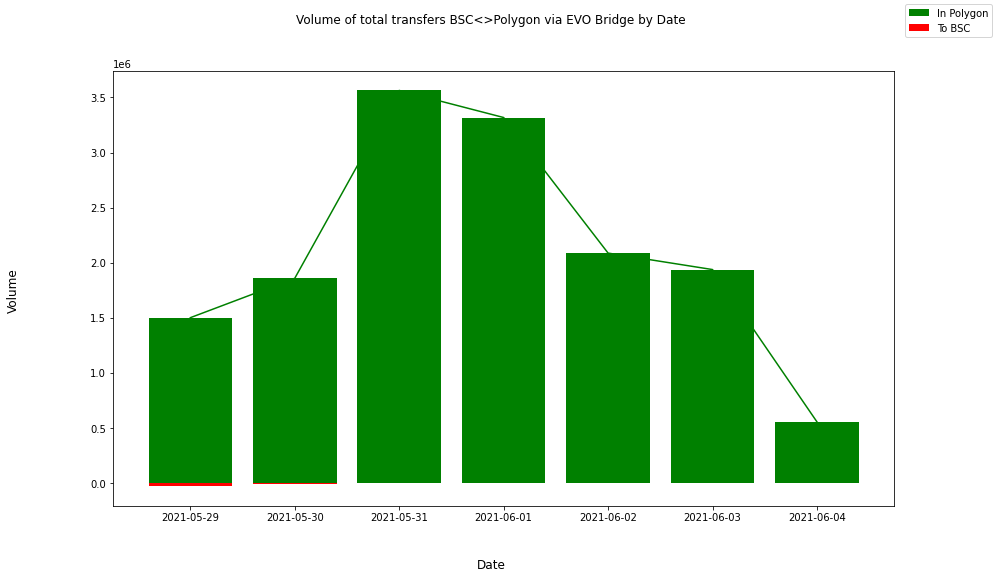

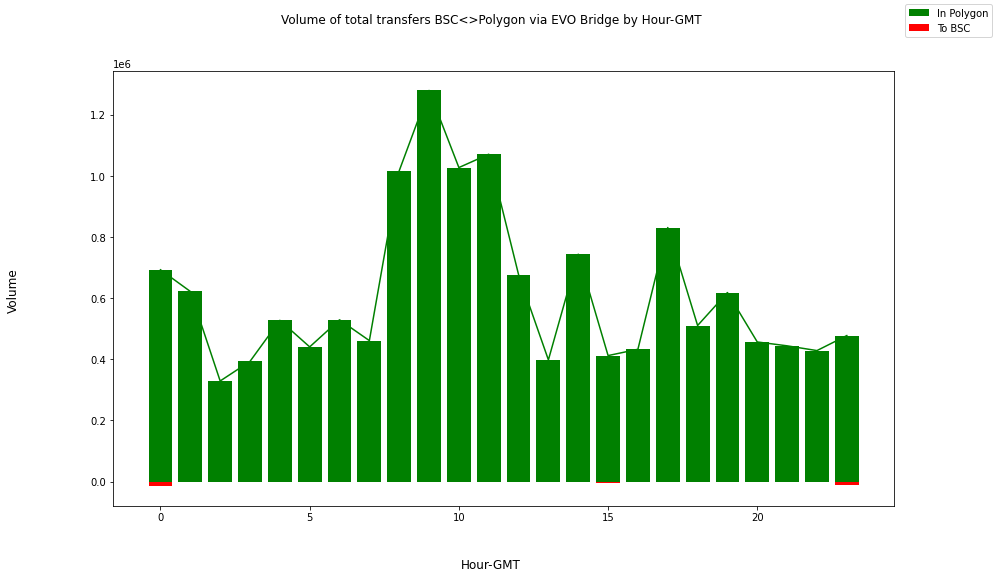

In [ ]:
# 'Date' 'Hour', 'Month', 'Week', 'Weekday', 'DayName'
plotVolumeByTime(period = "Date")
plotVolumeByTime(period = "Hour-GMT")
plotVolumeByTime(period = "DayName")